# Nobel Prize: A Deep Dive into 120 Years of Celebrated Achievements

## Setup and Context
### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize. Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”. Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

The primary aim of this project is to identify trends within the data related to former Nobel laureates:
* What trends emerge when analyzing data on past Nobel laureates?
* What insights can the Nobel Prize offer about our world at large?

**Main questions to answer:**
1. Gender distribution among the laureates: Male vs. Female.
2. Who are the multiple-time recipients of the award?
3. How many prizes were awarded over time and across categories?
4. Which countries and research organizations have garnered the most Nobel Prizes?
5. What are the patterns in the laureate age at the time of the award?

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')

**Caveats:** The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. They are substituted with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

#### Preliminary data exploration

In [4]:
print(f'Rows: {df_data.shape[0]}. Columns: {df_data.shape[1]}')
df_data.info()

Rows: 962. Columns: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  

* The dataset has 16 attributes and contains 962 entries.
* A few columns has all non-null values: year, category, prize, prize_share, laureate_type, full_name. All other columns has missing values, which need to be checked.
* All columns except year has 'object' data type. Data type in the columns 'prize_share', 'birthdate' are to be changed to integer and date correspondingly.

In [5]:
df_data.describe()

year
count   962.00
mean  1,971.82
std      33.81
min   1,901.00
25%   1,948.00
50%   1,977.00
75%   2,001.00
max   2,020.00

* The Noble Prize was first awarded in 1901 and 2020 is the last year included in the dataset.

##### Display some observations from the dataset

In [6]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [7]:
df_data.tail()

year  category                                           prize  \
957  2020  Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020     Peace                      The Nobel Peace Prize 2020   
959  2020   Physics                 The Nobel Prize in Physics 2020   
960  2020   Physics                 The Nobel Prize in Physics 2020   
961  2020   Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                   full_name  birth_date  \
957    Individual            Michael Houghton  1949-07-02   
958  Organization  World Food Programme (WFP)         NaN   
959    Individual                 Andrea Ghez  1965-06-16   
960    Individual             Reinhard Genzel  1952-03-24   
961    Individual               Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      organization_country  ISO  
957          Edmonton                    Canada  GBR  
958               NaN                       NaN  NaN  
959      Berkeley, CA  United States of America  USA  
960   Los Angeles, CA  United States of America  DEU  
961            Oxford            United Kingdom  GBR

### Check for Duplicates

In [8]:
print(f'There are duplicates: {df_data.duplicated().values.any()}')

There are duplicates: False


### Check for NaN Values

In [9]:
print(f'There are NaN values: {df_data.isna().values.any()}')

There are NaN values: True


In [10]:
# Count of the NaN values per column
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

As it was previously identified 10 columns in the dataset have NaN values.

Let's investigate why do these columns have NaN values.

In [11]:
# Filtering on the NaN values in the birth_date column
col_subset = ['year', 'category', 'laureate_type', 'birth_date', 'full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

year category laureate_type birth_date  \
24   1904    Peace  Organization        NaN   
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   
237  1947    Peace  Organization        NaN   
238  1947    Peace  Organization        NaN   
283  1954    Peace  Organization        NaN   
348  1963    Peace  Organization        NaN   
349  1963    Peace  Organization        NaN   
366  1965    Peace  Organization        NaN   
399  1969    Peace  Organization        NaN   
479  1977    Peace  Organization        NaN   
523  1981    Peace  Organization        NaN   
558  1985    Peace  Organization        NaN   
588  1988    Peace  Organization        NaN   
659  1995    Peace  Organization        NaN   
682  1997    Peace  Organization        NaN   
703  1999    Peace  Organization        NaN   
730  2001    Peace  Organization        NaN   
778  2005    Peace  Organization        NaN   
788  2006    Peace  Organization        NaN   
801  2007    Peace  Organization        NaN   
860  2012    Peace  Organization        NaN   
873  2013    Peace  Organization        NaN   
897  2015    Peace  Organization        NaN   
919  2017    Peace  Organization        NaN   
958  2020    Peace  Organization        NaN   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN  
237   American Friends Service Committee (The Quakers)               NaN  
238              Friends Service Council (The Quakers)               NaN  
283  Office of the United Nations High Commissioner...               NaN  
348  Comité international de la Croix Rouge (Intern...               NaN  
349  Ligue des Sociétés de la Croix-Rouge (League o...               NaN  
366            United Nations Children's Fund (UNICEF)               NaN  
399         International Labour Organization (I.L.O.)               NaN  
479                              Amnesty International               NaN  
523  Office of the United Nations High Commissioner...               NaN  
558  International Physicians for the Prevention of...               NaN  
588                 United Nations Peacekeeping Forces               NaN  
659   Pugwash Conferences on Science and World Affairs               NaN  
682     International Campaign to Ban Landmines (ICBL)               NaN  
703                           Médecins Sans Frontières               NaN  
730                              United Nations (U.N.)               NaN  
778          International Atomic Energy Agency (IAEA)               NaN  
788                                       Grameen Bank               NaN  
801   Intergovernmental Panel on Climate Change (IPCC)               NaN  
860                                European Union (EU)               NaN  
873  Organisation for the Prohibition of Chemical W...               NaN  
897                          National Dialogue Quartet               NaN  
919  International Campaign to Abolish Nuclear Weap...               NaN  
958                         World Food Programme (WFP)               NaN

* There are no values in the birth_date columns, as all the entries are related to an organisation and not a person. That makes sense.
* Since the organisation's name is in the full_name column, the organisation_name column contains NaN values.

In [12]:
# Filtering on the NaN values in the organization_name column
col_subset = ['year', 'category', 'laureate_type', 'full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

year    category laureate_type                           full_name  \
1    1901  Literature    Individual                     Sully Prudhomme   
3    1901       Peace    Individual                      Frédéric Passy   
4    1901       Peace    Individual                   Jean Henry Dunant   
7    1902  Literature    Individual  Christian Matthias Theodor Mommsen   
9    1902       Peace    Individual                Charles Albert Gobat   
..    ...         ...           ...                                 ...   
932  2018       Peace    Individual                         Nadia Murad   
942  2019  Literature    Individual                        Peter Handke   
946  2019       Peace    Individual                      Abiy Ahmed Ali   
954  2020  Literature    Individual                        Louise Glück   
958  2020       Peace  Organization          World Food Programme (WFP)   

    organization_name  
1                 NaN  
3                 NaN  
4                 NaN  
7                 NaN  
9                 NaN  
..                ...  
932               NaN  
942               NaN  
946               NaN  
954               NaN  
958               NaN  

[255 rows x 5 columns]

* In rows where the organization_name column has no value, many prizes went to people who were not affiliated with a university or research institute. That again makes sense.

### Type Conversions

#### Convert Year and Birth Date to Datetime

In [13]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [14]:
# Split the string on the forward slash
seperated_values = df_data.prize_share.str.split('/', expand=True)

numerator = pd.to_numeric(seperated_values[0])
denomenator = pd.to_numeric(seperated_values[1])

# Adding a column that contains the percentage share
df_data['share_pct'] = numerator / denomenator

In [15]:
# Check if the type conversions were successful
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

Type conversions were successful:
* birth_date has 'datetime64s' data type;
* new column share_pct has float64 data type.

# Percentage of Male vs. Female Laureates

In [16]:
biology = df_data.sex.value_counts()
fig = px.pie(labels=biology.index,
             values=biology.values,
             title='Percentage of Male vs. Female Laureates',
             names=biology.index,
             hole=0.4,
             color_discrete_sequence=px.colors.qualitative.T10,
            )

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

/Users/nadyavoynich/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


* Out of all the Nobel laureates since 1901, only about 6.2% were women.

# Who were the first 3 Women to Win the Nobel Prize?

In [17]:
df_data[df_data.sex == "Female"].sort_values('year', ascending=True)[:3]

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL       0.25  
29                  NaN  CZE       1.00  
51                  NaN  SWE       1.00

* Certainly, among the names, we come across one of the renowned figures: **Marie Skłodowska-Curie** from Poland, who was the first female Nobel laureate.  
* In 1905 Baroness **Bertha Sophie Felicita von Suttner** from Czech Republic became the second female Nobel laureate and the first woman to be awarded the Nobel Peace Prize. 
* The third woman to win the Nobel Prize was **Selma Ottilia Lovisa Lagerlöf** from Sweden. She was awarded the Nobel Prize in Literature.
* All three women were not a part of any organisation.

# Find the Repeat Winners

In [18]:
is_winner = df_data.duplicated(subset='full_name', keep=False)
multiple_winners = df_data[is_winner]
print(f'There are {multiple_winners.full_name.nunique()} '\
     'winners who were awarded the prize more than once.')

There are 6 winners who were awarded the prize more than once.


In [19]:
col_subset = ['year', 'category', 'motivation', 'laureate_type', 'full_name', 'birth_country_current']
multiple_winners[col_subset]

year   category                                         motivation  \
18   1903    Physics  "in recognition of the extraordinary services ...   
62   1911  Chemistry  "in recognition of her services to the advance...   
89   1917      Peace                                                NaN   
215  1944      Peace                                                NaN   
278  1954  Chemistry  "for his research into the nature of the chemi...   
283  1954      Peace                                                NaN   
297  1956    Physics  "for their researches on semiconductors and th...   
306  1958  Chemistry  "for his work on the structure of proteins, es...   
340  1962      Peace                                                NaN   
348  1963      Peace                                                NaN   
424  1972    Physics  "for their jointly developed theory of superco...   
505  1980  Chemistry  "for their contributions concerning the determ...   
523  1981      Peace                                                NaN   

    laureate_type                                          full_name  \
18     Individual                        Marie Curie, née Sklodowska   
62     Individual                        Marie Curie, née Sklodowska   
89   Organization  Comité international de la Croix Rouge (Intern...   
215  Organization  Comité international de la Croix Rouge (Intern...   
278    Individual                                 Linus Carl Pauling   
283  Organization  Office of the United Nations High Commissioner...   
297    Individual                                       John Bardeen   
306    Individual                                   Frederick Sanger   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

        birth_country_current  
18                     Poland  
62                     Poland  
89                        NaN  
215                       NaN  
278  United States of America  
283                       NaN  
297  United States of America  
306            United Kingdom  
340  United States of America  
348                       NaN  
424  United States of America  
505            United Kingdom  
523                       NaN

* Marie Skłodowska-Curie was also the first person to win a Nobel Prize twice, and the only person to win a Nobel Prize in two scientific fields.
* 4 of the repeat laureates were individuals.
* The International Committee of the Red Cross was awarded 3 times: in 1917, 1944, and 1963.
* The Office of the United Nations High Commissioner for Human Rights, commonly known as the United Nations Human Rights Office, was awarded twice (1954, 1981).

# Number of Prizes per Category

In [20]:
df_data.category.nunique()

6

In [21]:
prizes_per_category = df_data.category.value_counts()

v_bar = px.bar(x=prizes_per_category.index,
              y=prizes_per_category.values,
              color=prizes_per_category.values,
              color_continuous_scale='Teal',
              title='Number of Prizes Awarded per Category')

v_bar.update_layout(xaxis_title='Nobel Prize Category',
                   yaxis_title='Number of Prizes',
                   coloraxis_showscale=False)

v_bar.show()

* Prizes are awarded in 6 categories.
* Medicine category has the most number of prizes awarded, while Economics category has the fewest number.
* Why are there so few prizes in the field of economics?

In [22]:
df_data[df_data.category == 'Economics'].sort_values('year')[:3]

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   

    laureate_type          full_name birth_date birth_city  \
393    Individual      Jan Tinbergen 1903-04-12  the Hague   
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   

                birth_country     birth_country_current   sex  \
393               Netherlands               Netherlands  Male   
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   

                               organization_name organization_city  \
393          The Netherlands School of Economics         Rotterdam   
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   

         organization_country  ISO  share_pct  
393               Netherlands  NLD       0.50  
394                    Norway  NOR       0.50  
402  United States of America  USA       1.00

* The economics prize is much newer. It was first awarded in 1969, compared to 1901 for physics. This is why the economics category has the lowest number of prizes.

# Male and Female Winners by Category

Only 6.2% of Nobel prize winners were female. Does this vary by category?

In [57]:
cat_men_women = df_data.groupby(['category', 'sex'],
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women

category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2

In [24]:
v_bar_split = px.bar(x = cat_men_women.category,
                     y = cat_men_women.prize,
                     color=cat_men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women',
                     color_discrete_sequence=px.colors.qualitative.T10,
                    )

v_bar_split.update_layout(xaxis_title='Nobel Prize Category',
                         yaxis_title='Number of Prizes')

v_bar_split.show()

* Overall the imbalance is pretty large with physics, economics, and chemistry.
* Women are somewhat more represented in categories of medicine, literature and peace. 

# Number of Prizes Awarded Over Time

Are more prizes awarded recently than when the prize was first created?

In [58]:
# Count the number of Nobel prizes that are awarded each year
prize_per_year = df_data.groupby(by='year').count().prize
prize_per_year.sum()

962

In [26]:
# Calculate the 5-year moving average 
moving_average = prize_per_year.rolling(window=5).mean()
moving_average[:10]

year
1901    NaN
1902    NaN
1903    NaN
1904    NaN
1905   6.20
1906   6.20
1907   6.00
1908   6.00
1909   6.20
1910   6.20
Name: prize, dtype: float64

In [27]:
yearly_avg_share = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
yearly_avg_share

share_pct
year           
1901       0.83
1902       0.71
1903       0.71
1904       0.83
1905       1.00
...         ...
2016       0.55
2017       0.50
2018       0.46
2019       0.43
2020       0.50

[117 rows x 1 columns]

In [28]:
share_moving_average = yearly_avg_share.rolling(window=5).mean()
share_moving_average

share_pct
year           
1901        NaN
1902        NaN
1903        NaN
1904        NaN
1905       0.82
...         ...
2016       0.52
2017       0.50
2018       0.50
2019       0.50
2020       0.49

[117 rows x 1 columns]

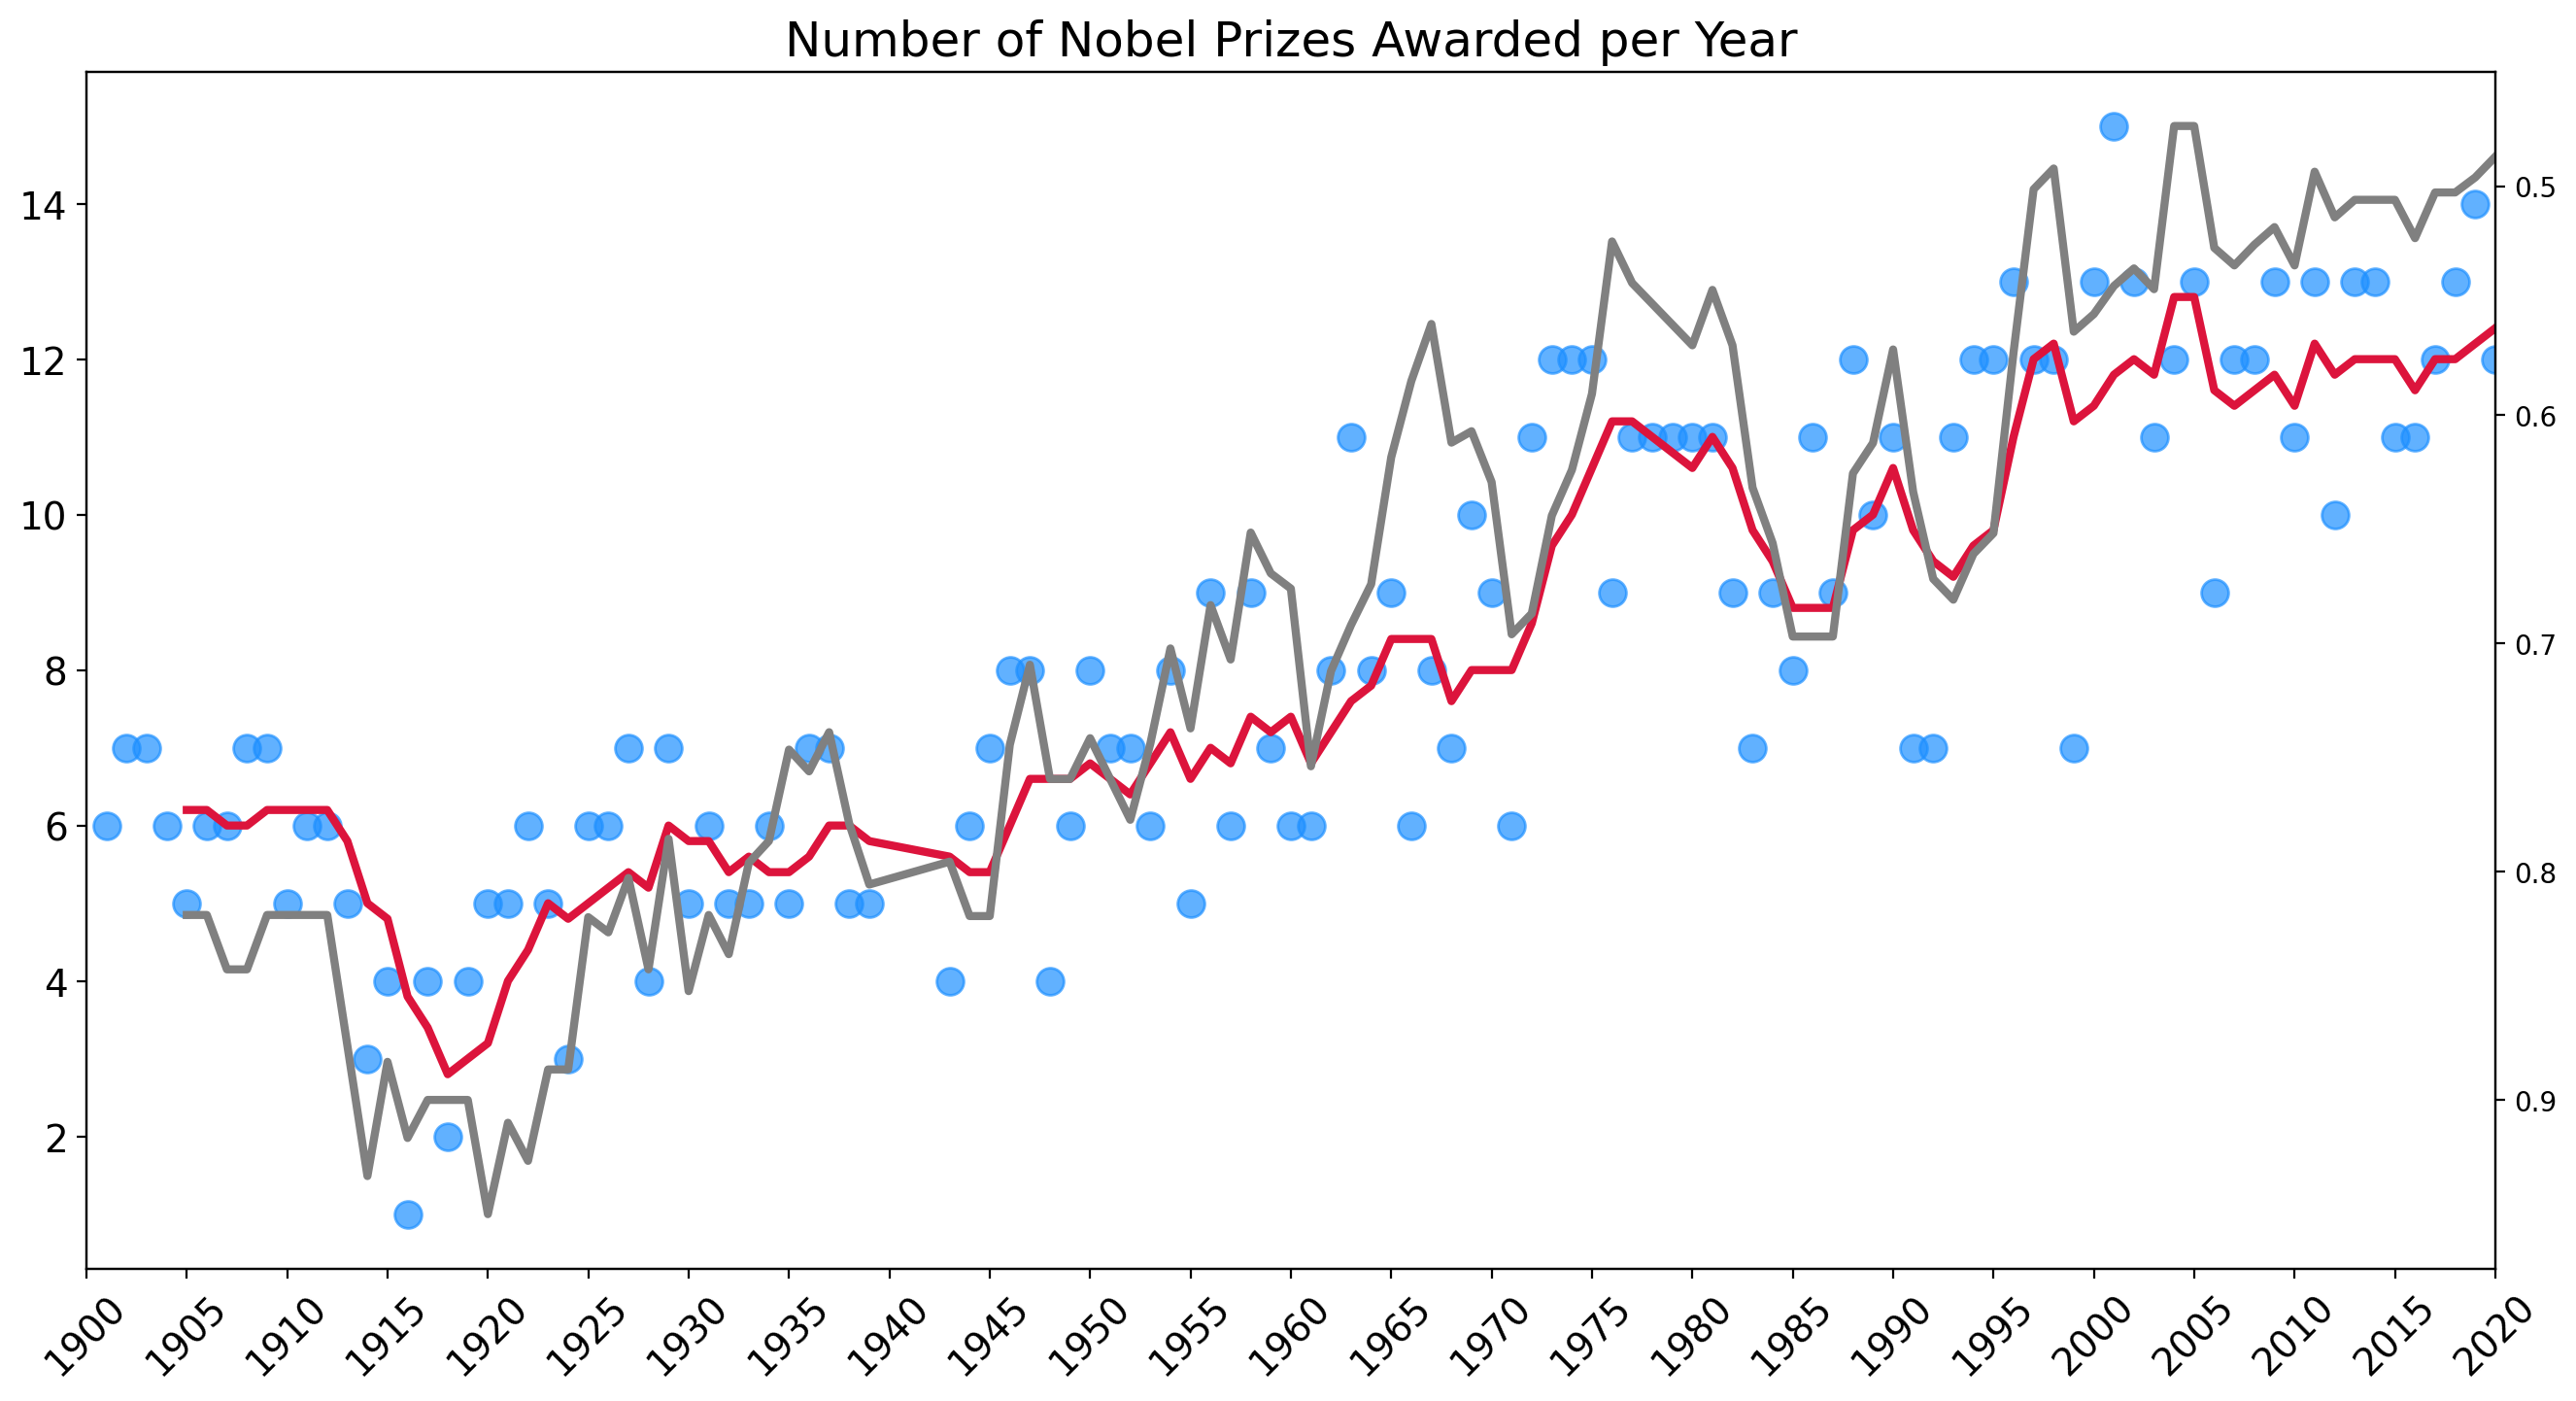

In [29]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
          fontsize=14,
          rotation=45)

ax1 = plt.gca() # get current axis with prizes
ax2 = ax1.twinx() # create second y-axis with the laureate share
ax1.set_xlim(1900, 2020)

# Invert the secondary axis to see the relationship between the prizes and the laureate share more clearly 
ax2.invert_yaxis()

# Scatterplot with the number of prizes awarded every year
ax1.scatter(x=prize_per_year.index,
           y=prize_per_year.values,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

# The rolling average line
ax1.plot(prize_per_year.index,
        moving_average.values,
        c='crimson',
        linewidth=3,)

# Adding prize share plot on second axis
ax2.plot(prize_per_year.index,
        share_moving_average.values,
        c='grey',
        linewidth=3,)

plt.show()

* Over the course of 120 years, 962 Nobel Prizes have been awarded.
* There is clearly an upward trend in the number of prizes being given out as more and more prizes are shared.
* Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category.
* We also see that very few prizes were awarded during the first and second world wars. Note: Instead of there being a zero entry for those years, we instead see the effect of the wards as missing blue dots.

# The Countries with the Most Nobel Prizes

What is the ranking for the top 20 countries in terms of the number of prizes?

In [30]:
top_countries = df_data.groupby(['birth_country_current'],
                                as_index=False).agg({'prize': pd.Series.count})

top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]

top20_countries

birth_country_current  prize
7                    Belgium      9
31                   Hungary      9
33                     India      9
2                  Australia     10
20                   Denmark     12
54                    Norway     12
13                     China     12
51               Netherlands     18
3                    Austria     18
39                     Italy     19
68               Switzerland     19
11                    Canada     20
61                    Russia     26
40                     Japan     27
57                    Poland     27
67                    Sweden     29
25                    France     57
26                   Germany     84
73            United Kingdom    105
74  United States of America    281

In [31]:
h_bar = px.bar(x=top20_countries.prize,
              y=top20_countries.birth_country_current,
              orientation='h',
              color=top20_countries.prize,
              color_continuous_scale='Viridis',
              title='Top 20 Countries by Number of Prizes')

h_bar.update_layout(xaxis_title='Number of Prizes',
                   yaxis_title='Country',
                   coloraxis_showscale=False,)

h_bar.show()

* The United States has a massive number of prizes by this measure.
* The UK and Germany are in second and third place respectively.

### The Number of Prizes Won by Country on the Choropleth Map

In [32]:
# Using of the ISO codes to show the ranking on a colour coded map
df_countries = df_data.groupby(['birth_country_current', 'ISO'],
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

birth_country_current  ISO  prize
74  United States of America  USA    281
73            United Kingdom  GBR    105
26                   Germany  DEU     84
25                    France  FRA     57
67                    Sweden  SWE     29
..                       ...  ...    ...
32                   Iceland  ISL      1
47                Madagascar  MDG      1
34                 Indonesia  IDN      1
36                      Iraq  IRQ      1
78                  Zimbabwe  ZWE      1

[79 rows x 3 columns]

In [60]:
world_map = px.choropleth(df_countries,
                         locations='ISO',
                         color='prize',
                         hover_name='birth_country_current',
                         color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

In [34]:
# Count the prizes by category in each country
cat_country = df_data.groupby(['birth_country_current', 'category'],
                              as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)
cat_country

birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
97                       Iraq      Peace      1
99                    Ireland   Medicine      1
100                   Ireland    Physics      1
102                    Israel  Economics      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]

In [35]:
# Merge the DataFrame above with the top20_countries
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')

# Change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values(by='total_prize', inplace=True)

merged_df

birth_country_current   category  cat_prize  total_prize
109                     India    Physics          1            9
108                     India      Peace          1            9
88                    Belgium      Peace          3            9
89                    Belgium   Medicine          3            9
90                    Belgium  Chemistry          1            9
..                        ...        ...        ...          ...
4    United States of America      Peace         19          281
3    United States of America  Economics         49          281
2    United States of America  Chemistry         55          281
1    United States of America    Physics         70          281
0    United States of America   Medicine         78          281

[110 rows x 4 columns]

In [36]:
cat_country_bar = px.bar(x=merged_df.cat_prize,
                         y=merged_df.birth_country_current,
                         orientation='h',
                         color=merged_df.category,
                         title='Top 20 Countries by Number of Prizes and Category',
                         color_discrete_sequence=px.colors.qualitative.T10,
                        )

cat_country_bar.update_layout(xaxis_title='Number of Prizes',
                              yaxis_title='Country',
                              coloraxis_showscale=False,)

cat_country_bar.show()

* The US has won an incredible proportion of the prizes in the field of Economics. In comparison, Japan and Germany have won very few or no economics prize at all.
* Also, the US has more prizes in physics or medicine alone than all of France's prizes combined.
* Germany won more prizes in physics than the UK and that France has won more prizes in peace and literature than Germany, even though Germany has been awarded a higher total number of prizes than France.
* Medicine makes up most of Australia's Nobel prizes.
* Physics makes up half of the prizes in the Netherlands.

When did the United States become so dominant? Was it always this way? Has the prize become more global in scope?

### Number of Prizes Won by Each Country Over Time

In [37]:
# Number of prizes by country by year
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

year     birth_country_current  prize
118  1901                    France      2
346  1901                    Poland      1
159  1901                   Germany      1
312  1901               Netherlands      1
440  1901               Switzerland      1
..    ...                       ...    ...
31   2019                   Austria      1
221  2020                   Germany      1
622  2020  United States of America      7
533  2020            United Kingdom      2
158  2020                    France      1

[627 rows x 3 columns]

In [38]:
# Create a series that has cumulative sum for the number of prizes won
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [39]:
l_chart = px.line(cumulative_prizes,
                  x='year',
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current',
                  color_discrete_sequence=px.colors.qualitative.T10,
                 )

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')

l_chart.show()

* The United States experienced significant growth after the Second World War, a period that had devastated Europe. Before that, the Nobel Prize was primarily a European endeavor, with only a handful of laureates selected from other regions.
* This has changed dramatically in the last 40 years or so. Presently, a far more diverse range of countries is represented compared to the earlier years.
* Notably, a curious shift occurred between the United Kingdom and Germany in the 1970s and 1990s in terms of the total number of prizes won. The consistent fifth-place ranking of Sweden over numerous decades also adds an intriguing aspect to the analysis.

# What are the Top Research Organisations?

Where the actual research is happening? Where are the cities and organisations located where people actually make discoveries?

In [40]:
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)
top20_orgs

Sorbonne University                              7
Harvard Medical School                           7
Institut Pasteur                                 7
London University                                7
Bell Laboratories                                8
Cornell University                               8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Rockefeller University                          13
Max-Planck-Institut                             13
Princeton University                            15
California Institute of Technology (Caltech)    17
Columbia University                             17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of California       

In [41]:
org_bar = px.bar(x=top20_orgs.values,
                 y=top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions by Number of Prizes')

org_bar.update_layout(xaxis_title='Number of Prizes',
                      yaxis_title='Institution',
                      coloraxis_showscale=False,)

org_bar.show()

* The top 20 research institutions comprise internationally renowned universities, institutes, and laboratories.
* The absolute leader among research organizations is the University of California with 40 prizes.
* Affiliated with Harvard University are 29 Nobel laureates.

# Which Cities Make the Most Discoveries? 

In [42]:
top20_cities = df_data.organization_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
top20_cities

Ithaca, NY          8
Los Angeles, CA     8
New Haven, CT       9
Heidelberg          9
Boston, MA          9
Munich              9
Moscow             10
Stockholm          10
Berlin             12
Oxford             12
Pasadena, CA       17
Princeton, NJ      19
Chicago, IL        20
Berkeley, CA       21
Stanford, CA       24
Paris              25
London             27
Cambridge          31
New York, NY       45
Cambridge, MA      50
Name: organization_city, dtype: int64

In [43]:
city_bar2 = px.bar(x=top20_cities.values,
                   y=top20_cities.index,
                   orientation='h',
                   color=top20_cities.values,
                   color_continuous_scale=px.colors.sequential.Plasma,
                   title='Which Cities Do the Most Research?')

city_bar2.update_layout(xaxis_title='Number of Prizes',
                        yaxis_title='City',
                        coloraxis_showscale=False,)

city_bar2.show()

* Cambridge (MA) and New York in the United States lead the pack. These are the number one hotspot for discoveries in the world.
* Cambridge and London are cities in Europe, have been cities with the highest number of discoveries.

# Where are Nobel Laureates Born?

In [44]:
top20_birth_cities = df_data.birth_city.value_counts()[:20]
top20_birth_cities.sort_values(ascending=True, inplace=True)
top20_birth_cities

Ann Arbor, MI             3
Montreal                  4
Cairo                     4
Pittsburgh, PA            4
Prague                    5
Frankfurt-on-the-Main     5
Hamburg                   6
Stockholm                 6
Moscow                    7
Munich                    7
Budapest                  8
Brooklyn, NY              8
Washington, DC            8
Boston, MA                8
Berlin                   11
Chicago, IL              12
Vienna                   14
London                   19
Paris                    26
New York, NY             53
Name: birth_city, dtype: int64

In [45]:
city_bar = px.bar(x=top20_birth_cities.values,
                  y=top20_birth_cities.index,
                  orientation='h',
                  color=top20_birth_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')

city_bar.update_layout(xaxis_title='Number of Prizes',
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False,)

city_bar.show()

* The list of birth cities is quite different from the list above. Cambridge (MA), Stanford, Berkely and Cambridge (UK) are all the places where many discoveries are made, but they are not the birthplaces of laureates.

# Combine Country, City, and Organisation

In [46]:
country_city_org = df_data.groupby(by=['organization_country',
                                       'organization_city',
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

organization_country     organization_city  \
205  United States of America         Cambridge, MA   
280  United States of America          Stanford, CA   
206  United States of America         Cambridge, MA   
209  United States of America           Chicago, IL   
195  United States of America          Berkeley, CA   
..                        ...                   ...   
110                     Japan               Sapporo   
111                     Japan                 Tokyo   
112                     Japan                 Tokyo   
113                     Japan                 Tokyo   
290  United States of America  Yorktown Heights, NY   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  
..                                           ...    ...  
110                          Hokkaido University      1  
111                      Asahi Kasei Corporation      1  
112                          Kitasato University      1  
113                Tokyo Institute of Technology      1  
290         IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [47]:
burst = px.sunburst(country_city_org,
                   path=['organization_country', 'organization_city', 'organization_name'],
                   values='prize',
                   title='Where do Discoveries Take Place?')

burst.update_layout(xaxis_title='Number of Prizes',
                   yaxis_title='City',
                   coloraxis_showscale=False)

burst.show()

* France is a great example of concentration. Practically all the organisations affiliated with Nobel prize winners are in Paris.
* In contrast, scientific discoveries are much more spread out across Germany.
* Meanwhile, the UK is dominated by Cambridge and London.

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When they Win the Prize?

In [48]:
# Extract the year as a number from the birth_date column
birth_years = df_data.birth_date.dt.year

# Age at the time of the award
df_data['winning_age'] = df_data.year - birth_years

df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  winning_age  
0            Berlin              Germany  NLD       1.00        49.00  
1               NaN                  NaN  FRA       1.00        62.00  
2           Marburg              Germany  POL       1.00        47.00  
3               NaN                  NaN  FRA       0.50        79.00  
4               NaN                  NaN  CHE       0.50        73.00

### Who were the oldest and youngest winners?

In [49]:
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  share_pct  winning_age  
937  United States of America  DEU       0.33        97.00

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  share_pct  winning_age  
885                  NaN  PAK       0.50        17.00

* John Goodenough was 97 years old when he got the Nobel prize in chemistry.
* Malala Yousafzai from Pakistan was awarded when she was 17 years old.

### Descriptive Statistics for the Laureate Age at Time of Award

In [50]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

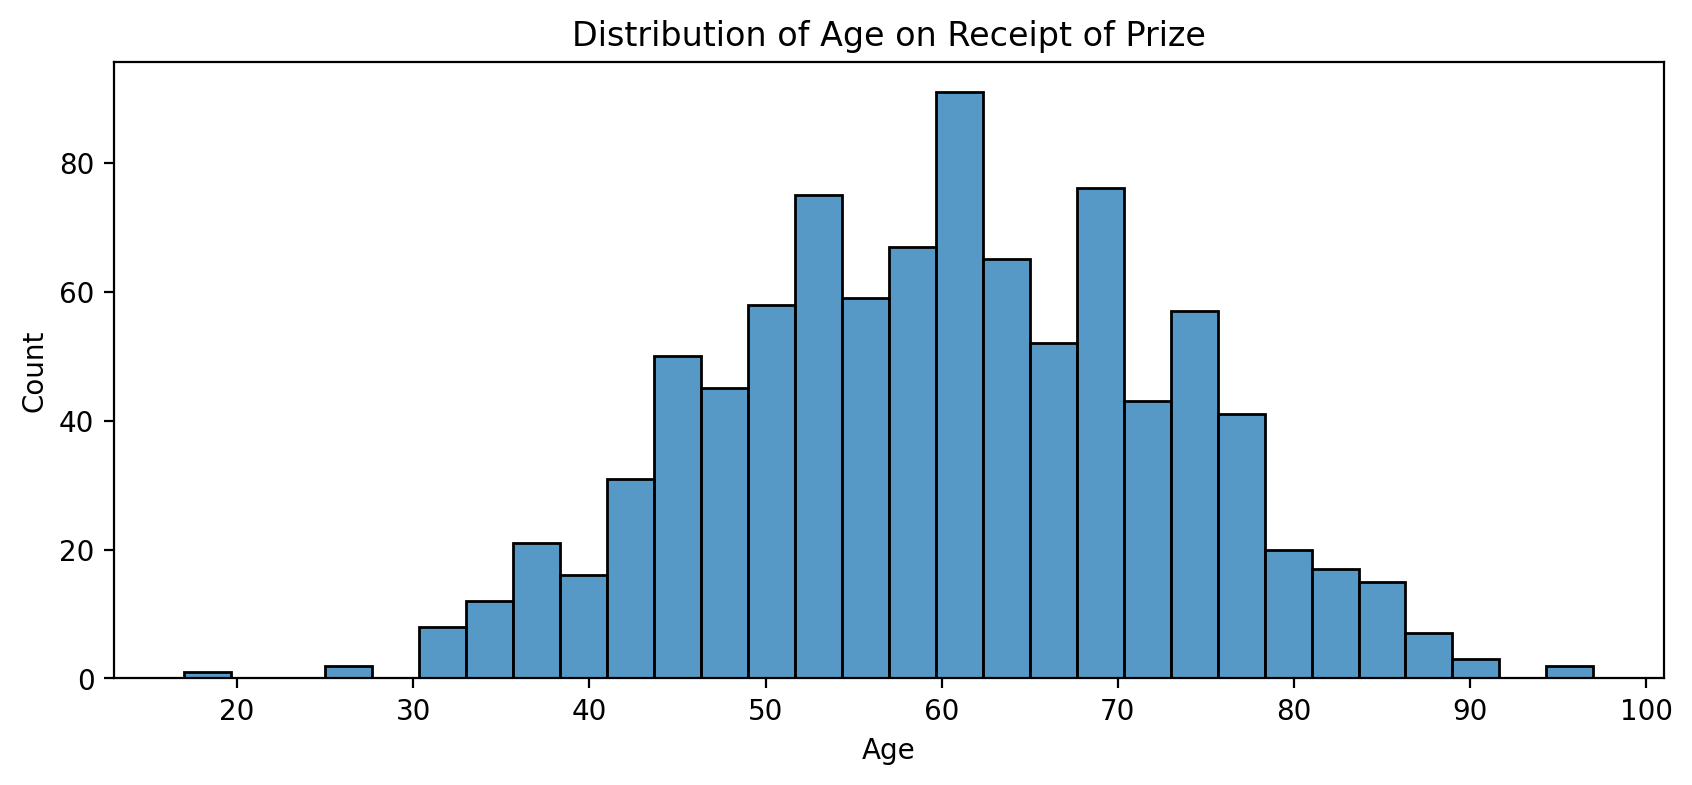

In [51]:
plt.figure(figsize=(10,4), dpi=200)

sns.histplot(data=df_data,
            x=df_data.winning_age,
            bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')

plt.show()

* The average age of a winner is around 60 years.
* 75% of laureates are younger than 69 years old when they receive the prize.

The histogram above shows us the distribution across the entire dataset, over the entire time period. But perhaps the age has changed over time.

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

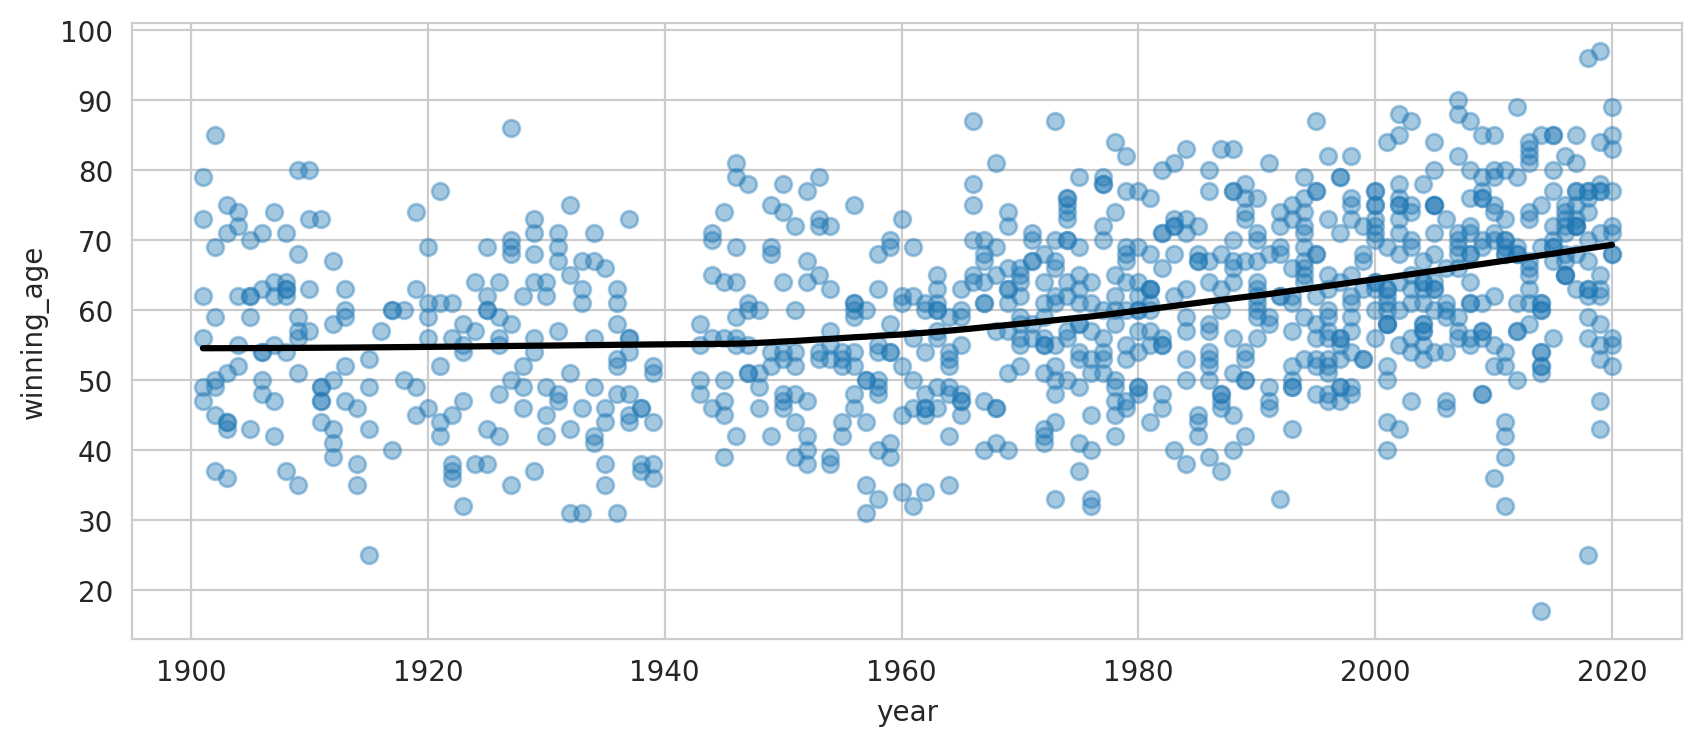

In [52]:
plt.figure(figsize=(10,4), dpi=200)

with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
               x='year',
               y='winning_age',
               lowess=True,
               scatter_kws={'alpha': 0.4},
               line_kws={'color': 'black'})
plt.show()

* Moving average represents a non-linear shape across the entire series. It clearly shows how the Nobel laureates are getting their award later and later in life.
* From 1900 to around 1950, the laureates were around 55 years old, but these days they are closer to 70 years old when they get their award.
* In the last 10 years the spread has increased. We've had more very young and very old winners. In 1950s/60s winners were between 30 and 80 years old. Lately, that range has widened.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

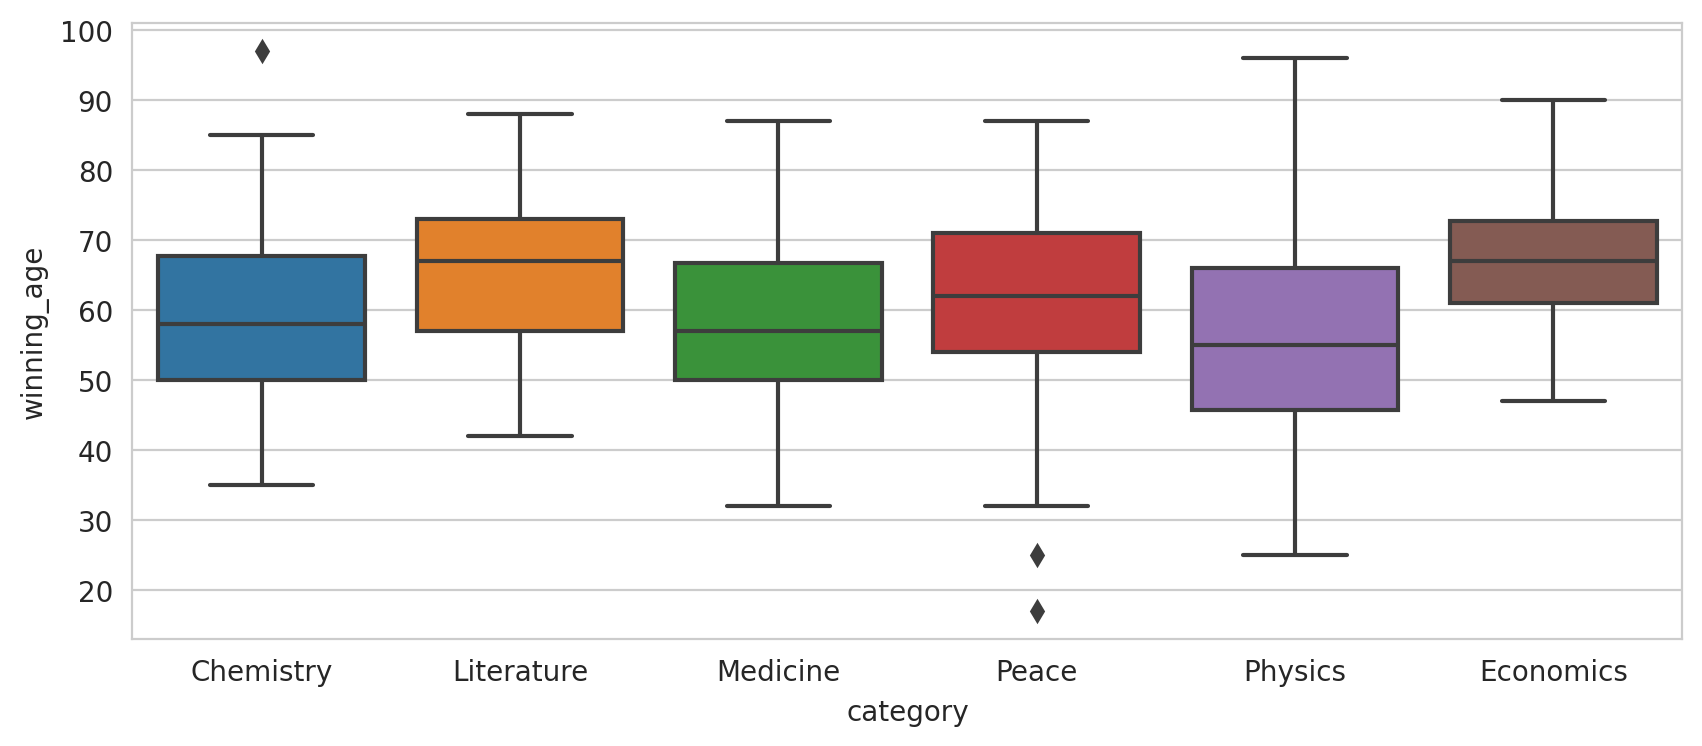

In [53]:
plt.figure(figsize=(10,4), dpi=200)

with sns.axes_style('whitegrid'):
    sns.boxplot(data=df_data,
               x='category',
               y='winning_age')
    
plt.show()

* The average winners are the oldest in literuture prize category.
* The average winners are the youngest in physics prize category.

This arises more questions:
* Are peace prize winners really older than physics laureates?
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down? 

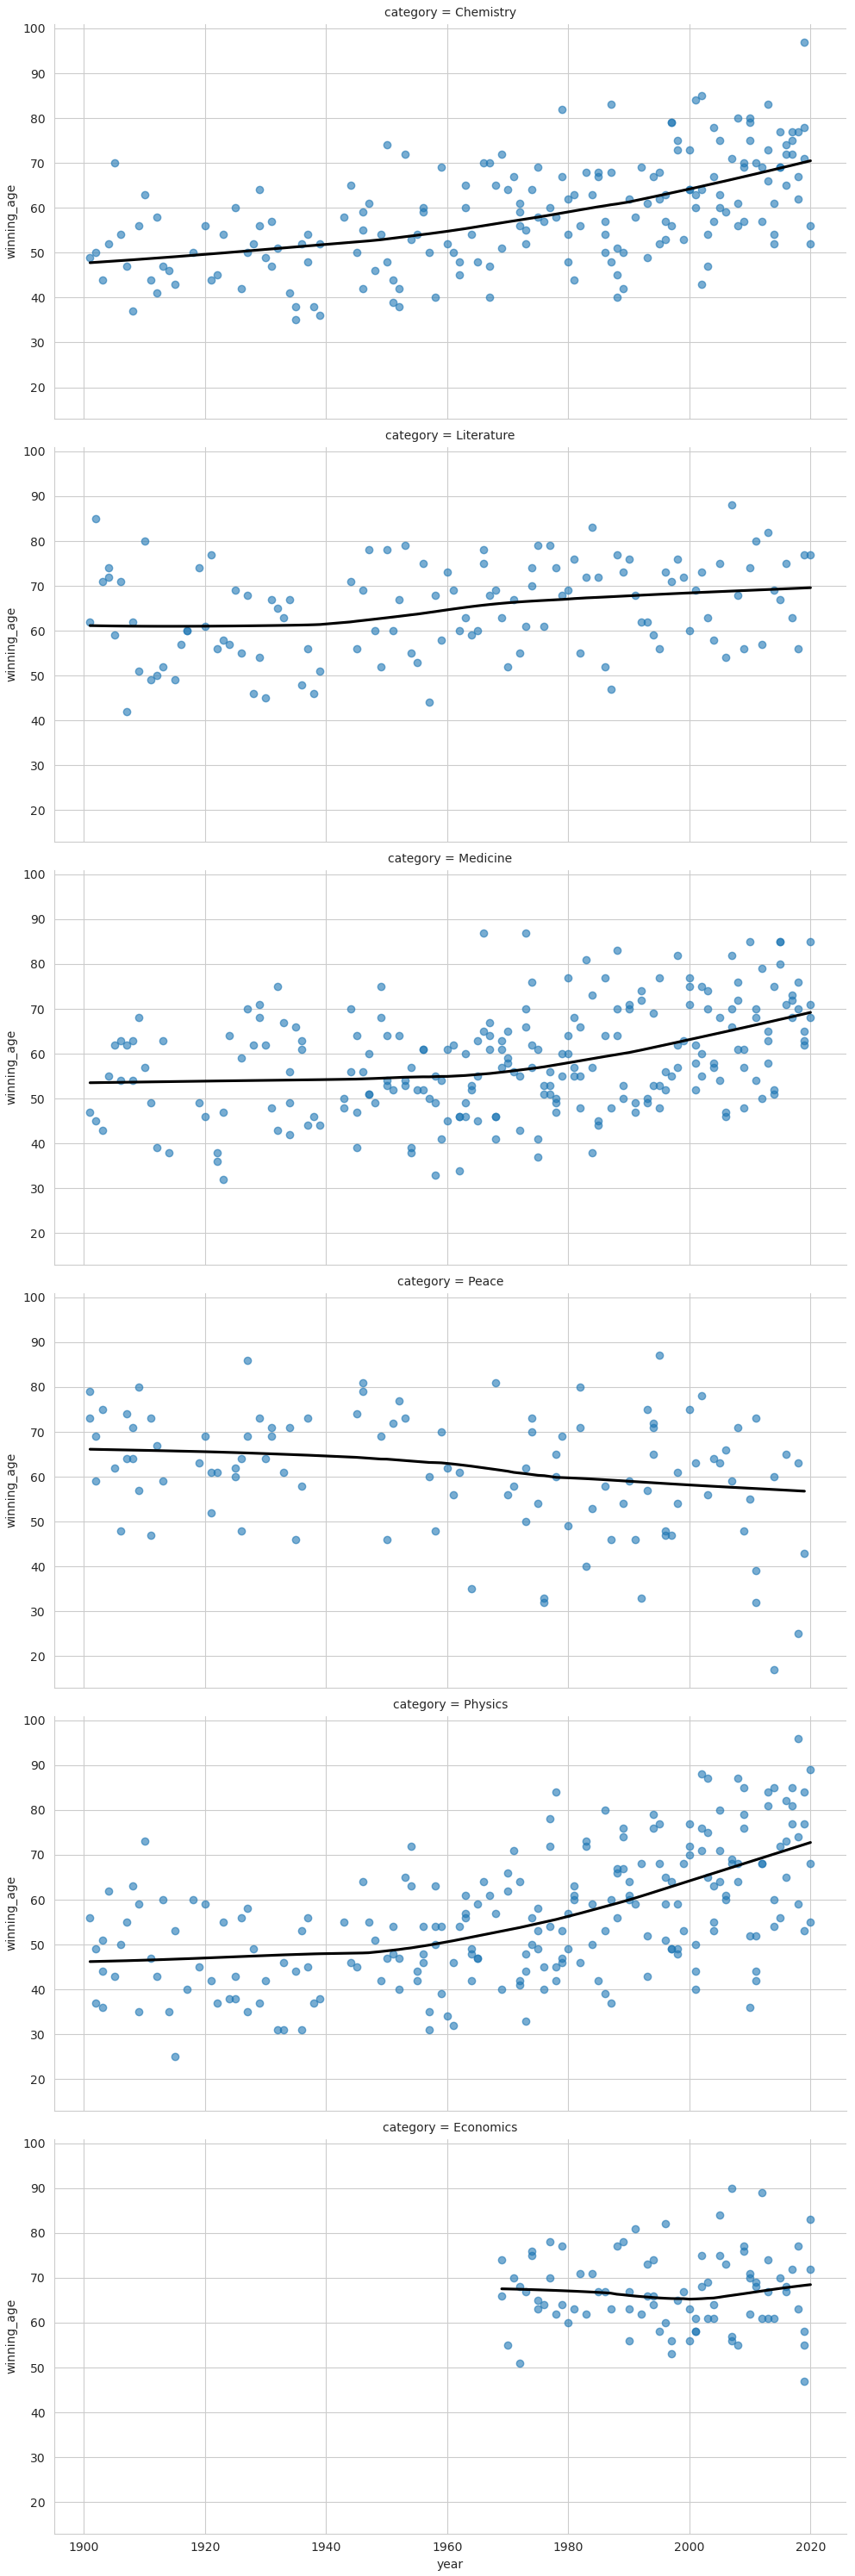

In [54]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
              x='year',
              y='winning_age',
              row='category',
              lowess=True,
              aspect=2,
              scatter_kws={'alpha': 0.6},
              line_kws={'color': 'black'})
plt.show()

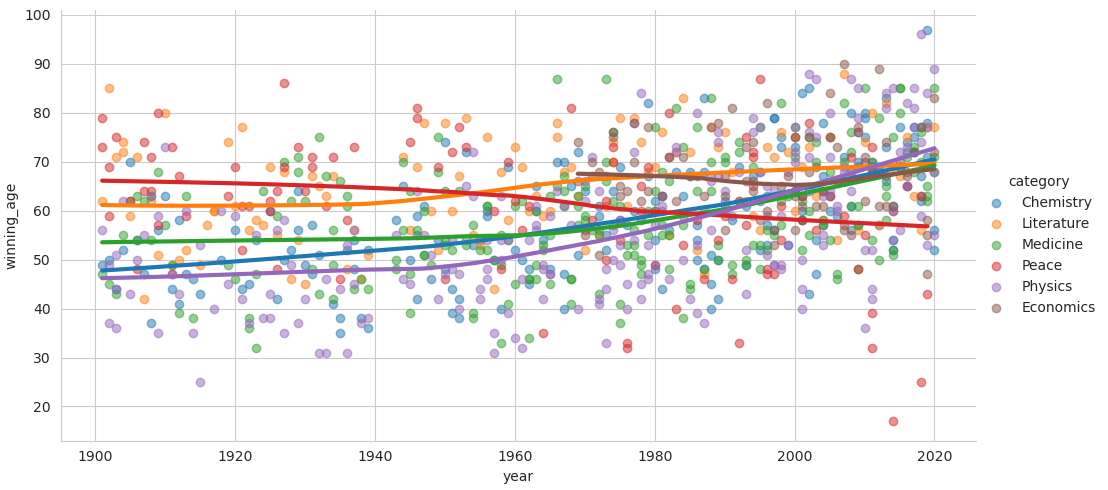

In [55]:
# To combine all these charts into the same chart, we can use the hue parameter

with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
              x='year',
              y='winning_age',
              hue='category',
              lowess=True,
              aspect=2,
              scatter_kws={'alpha': 0.5},
              line_kws={'linewidth': 3})
plt.show()

* Winners in physics, chemistry, and medicine have gotten older over time.
* The ageing trend is strongest for physics. The average age used to be below 50, but now it's over 70. 
* Economics, the newest category, is much more stable in comparison.
* The peace prize shows the opposite trend where winners are getting younger.